<a href="https://colab.research.google.com/github/Pulik1/SkillCraftTechnology/blob/main/SCT_0437_3_ipynb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload the dataset manually

Saving customer_purchase_data.csv to customer_purchase_data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Load the dataset
data = pd.read_csv('customer_purchase_data.csv')

# Check the columns to ensure correct target variable name
print(data.columns)

# Preprocess the data
X = data.drop('PurchaseStatus', axis=1)  # Features: All columns except 'PurchaseStatus'
y = data['PurchaseStatus']  # Target: 'PurchaseStatus' (whether a customer purchased or not)

# Convert categorical features like 'Gender' to numeric using get_dummies (one-hot encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model (using accuracy as an example)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')
Accuracy: 0.9


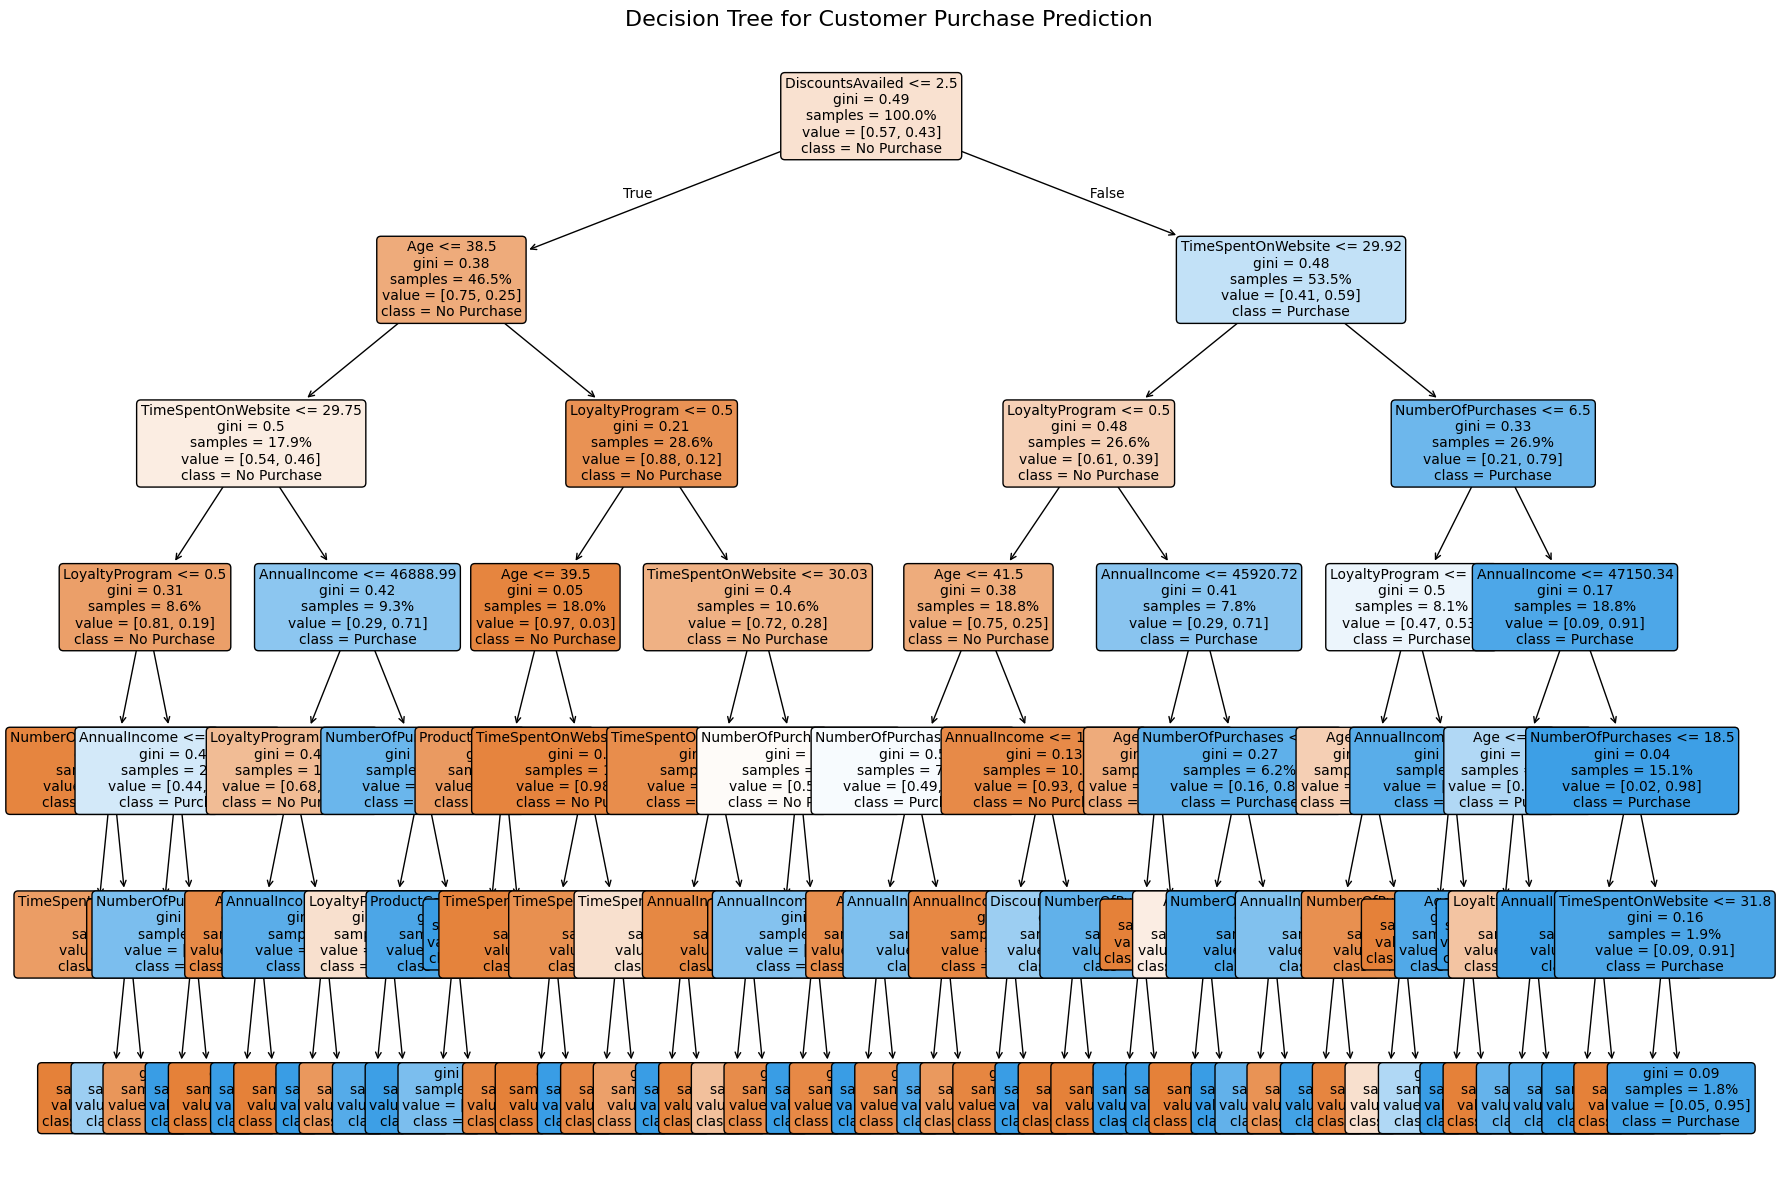

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the decision tree model
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

# Visualize the decision tree with a medium-sized figure
plt.figure(figsize=(18, 12))

# Plot the decision tree
plot_tree(clf,
          feature_names=X.columns,  # Feature names from the dataset
          class_names=['No Purchase', 'Purchase'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=6,
          proportion=True,
          precision=2)

# Title and layout adjustments
plt.title('Decision Tree for Customer Purchase Prediction', fontsize=16)
plt.tight_layout()
plt.show()


Accuracy: 0.82


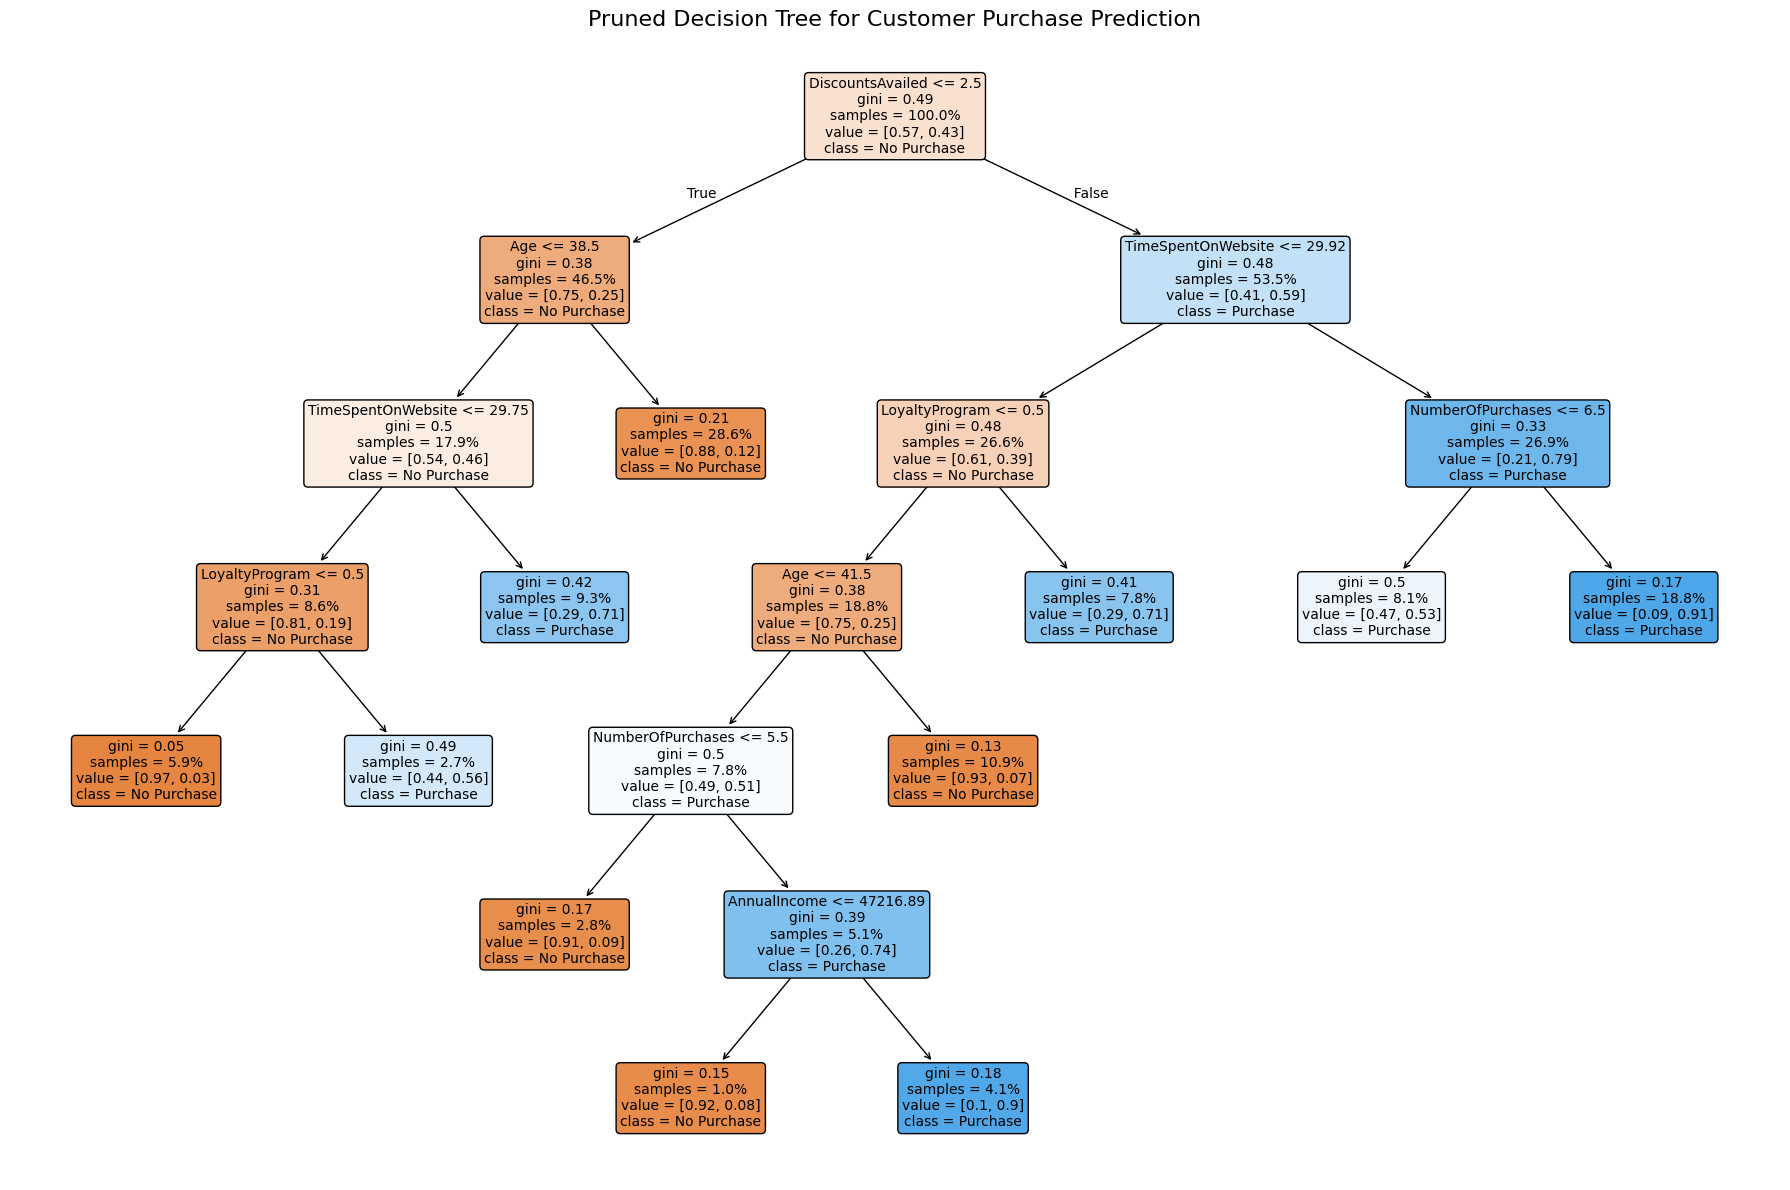

In [19]:
#pruned decision tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Define the features (X) and target (y)
X = data.drop('PurchaseStatus', axis=1)
y = data['PurchaseStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree classifier with pruning enabled using ccp_alpha
clf = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree with pruning
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the pruned decision tree
plt.figure(figsize=(18, 12))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['No Purchase', 'Purchase'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=6,
          proportion=True,
          precision=2)

# Title and layout adjustments
plt.title('Pruned Decision Tree for Customer Purchase Prediction', fontsize=16)
plt.tight_layout()  e
plt.show()
